In [1]:
from tourism import tourism

In [2]:
# load data, which takes a few seconds
handler = tourism.load('data/galicia.osm.pbf')

Number of tourism nodes: 3707
Uncounted tourism locations: 980


## Rough plotting to see if this looks like a map

In [3]:
import matplotlib.pyplot as plt

In [4]:
lats, lons, types, types = zip(*handler.geo_points)

In [5]:
len(lats)

3707

Text(0.5, 1.0, 'Tourist locations in Galicia, Spain')

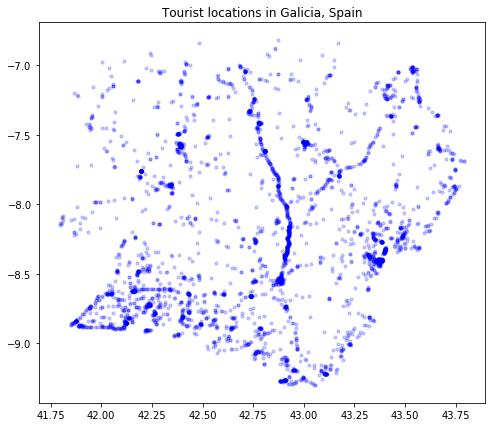

In [6]:
# Snippet inspired by examples on
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(lats, lons, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Tourist locations in Galicia, Spain')
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## Play with Dataframe

In [7]:
df = handler.get_dataframe()

In [8]:
df.head()

,lat,lon,type,subtype
0,42.538282,-8.870075,tourism,camp_site
1,42.365833,-8.118611,tourism,camp_site
2,43.349167,-8.335556,tourism,camp_site
3,42.061942,-8.888884,tourism,camp_site
4,43.309790,-8.244322,tourism,camp_site


In [12]:
# uncomment to write csv
# df.to_csv('tourism/data.csv')

Plot Dataframe

Text(0.5, 1.0, 'Tourist locations in Galicia, Spain')

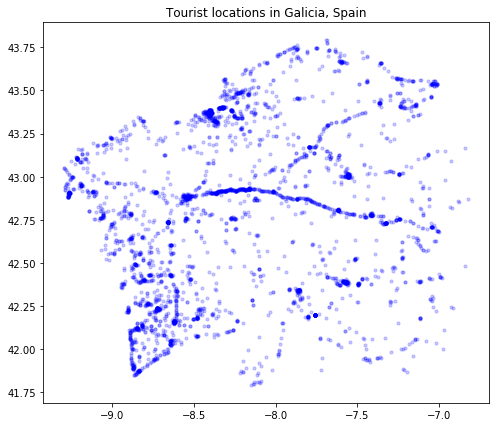

In [28]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df['lon'], df['lat'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Tourist locations in Galicia, Spain')

In [61]:
from collections import Counter
import numpy as np

tourism_subtype_info = Counter(df['subtype'])
print(tourism_subtype_info)
tourism_subtypes = list(set(df['subtype']))
#https://wiki.openstreetmap.org/wiki/Key:tourism
# https://wiki.openstreetmap.org/wiki/Tag:tourism=information: information centers & information boards
BBox = ((df.lon.min(),   df.lon.max(),      
         df.lat.min(), df.lat.max()))
print(BBox)

Counter({'information': 979, 'viewpoint': 616, 'hotel': 474, 'hostel': 394, 'artwork': 350, 'picnic_site': 292, 'guest_house': 185, 'attraction': 168, 'museum': 80, 'camp_site': 49, 'caravan_site': 35, 'motel': 19, 'chalet': 18, 'apartment': 14, 'yes': 10, 'gallery': 7, 'alpine_hut': 6, 'theme_park': 3, 'zoo': 3, 'camp_pitch': 2, 'wine_cellar': 1, 'aquarium': 1, 'wilderness_hut': 1})
(-9.2981424, -6.8187491, 41.7943737, 43.7903123)


Text(0.5, 1.0, 'Tourist locations in Galicia, Spain')

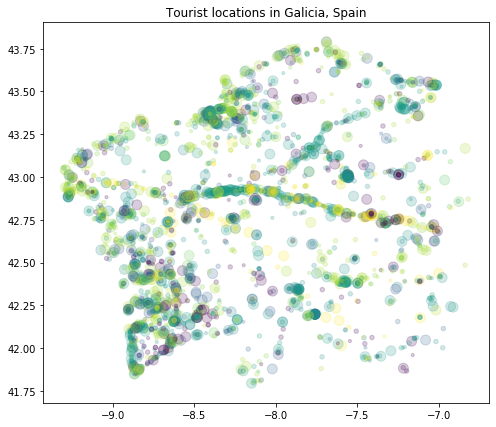

In [55]:
colors = [tourism_subtypes.index(df['subtype'][i]) for i in range(0, len(df['subtype']))]
sizes = np.ones((len(tourism_subtypes),1))*20
for typ in ['hotel','hostel','guest_house','apartment','motel','chalet']:
    sizes[tourism_subtypes.index(typ)] = 100
for typ in ['camp_site','caravan_site', 'camp_pitch', 'wilderness_hut']:
    sizes[tourism_subtypes.index(typ)] = 10


fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df['lon'], df['lat'], zorder=1,  alpha= 0.2, c= colors, s=sizes)
ax.set_title('Tourist locations in Galicia, Spain')